<div style="text-align: center;margin-left: -5%;  font-size: 35px;">
    <b>PRCP-1025-Flight Price Prediction</b>
</div>

<div style="text-align: center;margin-left: -5%;  font-size: 30px;">
    <b>TASK-1 : Data analysis report on the given data</b>
</div>

### 1) Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Flight_Fare.xlsx')

### Finding Columns

In [3]:
print(f"Dataset Shape: {df.shape}")
print(f"Dataset Columns: {df.columns}")

Dataset Shape: (10683, 11)
Dataset Columns: Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [4]:
print("First 5 Rows:")
print(df.head())

First 5 Rows:
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [5]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


In [ ]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


### Identifying Missing values

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [10]:
df=df.dropna()
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Visualization of Airline Distribution

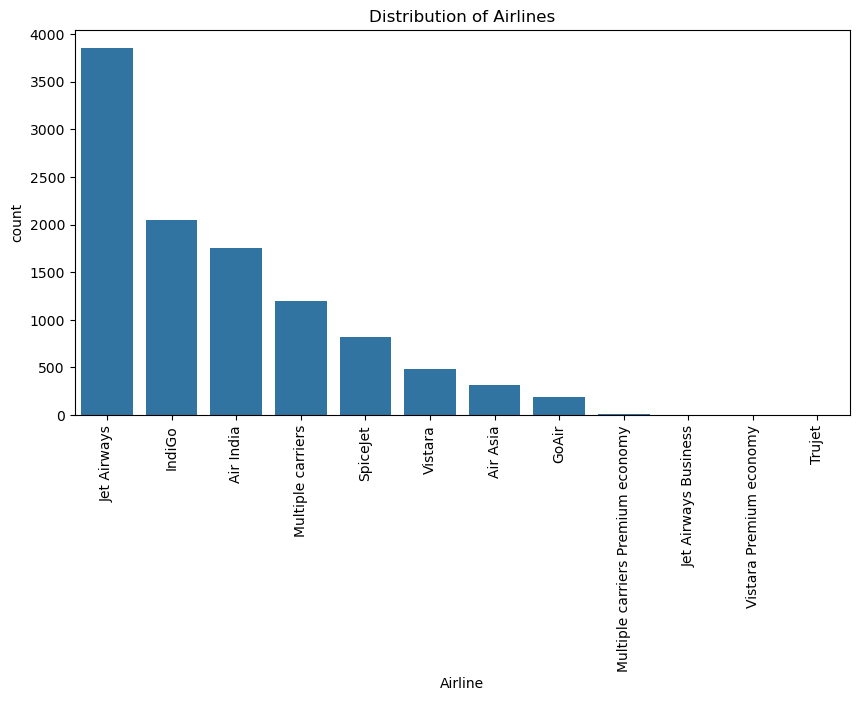

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Airlines")
plt.show()


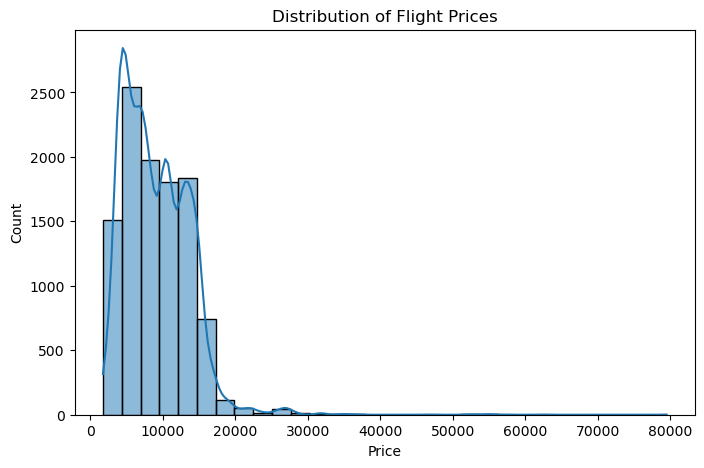

In [81]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title("Distribution of Flight Prices")
plt.show()


<div style="text-align: left;  font-size: 30px;">
    <b>Data Preprocessing</b>
</div>

### Formatting "Date_of_Journey" Column

In [12]:
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


### Formatting "Dep_Time" Column

In [13]:
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14812\1230043901.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14812\1230043901.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


### Formatting "Arrival_Time" Column

In [14]:
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14812\3155335605.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14812\3155335605.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### Deleting Unwanted Rows

In [15]:
df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [16]:
df.drop(['Dep_Time'], axis=1, inplace=True)
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Journey_Day      10682 non-null  int32 
 9   Journey_Month    10682 non-null  int32 
 10  Dep_Hour         10682 non-null  int32 
 11  Dep_Minute       10682 non-null  int32 
 12  Arrival_Hour     10682 non-null  int32 
 13  Arrival_Minute   10682 non-null  int32 
dtypes: int32(6), int64(1), object(7)
memory usage: 1001.4+ KB


### Formatting "Duration" Column

In [18]:
duration = list(df.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] +' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration
duration_hour=[]
duration_minute=[]

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0] ))
    duration_minute.append(int( duration[i].split('m')[0].split()[-1]))



In [19]:
df['Duration_Hour'] = duration_hour
df['Duration_Minute'] = duration_minute

In [20]:
df.drop(['Duration'], axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_Day      10682 non-null  int32 
 8   Journey_Month    10682 non-null  int32 
 9   Dep_Hour         10682 non-null  int32 
 10  Dep_Minute       10682 non-null  int32 
 11  Arrival_Hour     10682 non-null  int32 
 12  Arrival_Minute   10682 non-null  int32 
 13  Duration_Hour    10682 non-null  int64 
 14  Duration_Minute  10682 non-null  int64 
dtypes: int32(6), int64(3), object(6)
memory usage: 1.1+ MB


### Formatting "Airline" Column

In [22]:
df.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

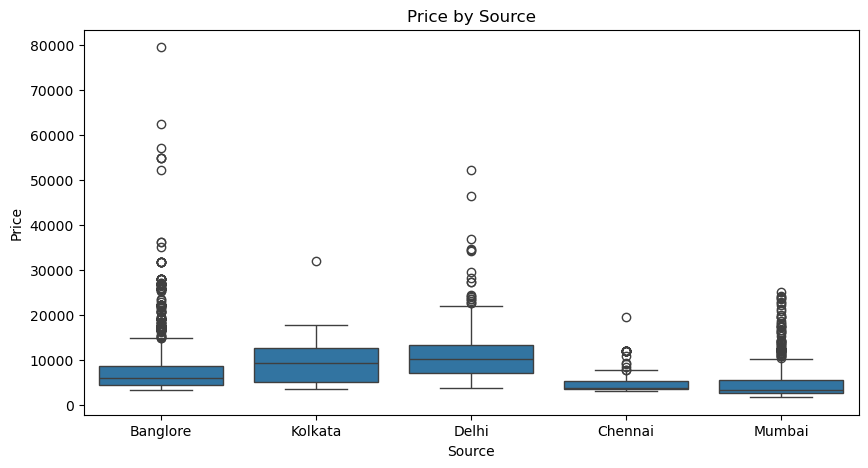

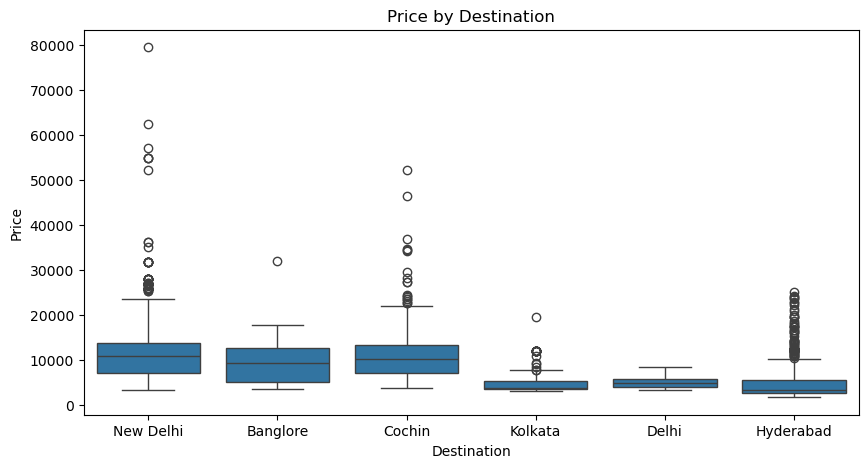

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Source', y='Price')
plt.title("Price by Source")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Destination', y='Price')
plt.title("Price by Destination")
plt.show()


In [24]:
Airline= pd.get_dummies(df['Airline'], drop_first=True).astype(int)



In [25]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [26]:
Source=pd.get_dummies(df['Source'], drop_first=True).astype(int)
Destination=pd.get_dummies(df['Destination'], drop_first=True).astype(int)

In [27]:
df.drop(columns=['Route','Additional_Info'], axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Price            10682 non-null  int64 
 5   Journey_Day      10682 non-null  int32 
 6   Journey_Month    10682 non-null  int32 
 7   Dep_Hour         10682 non-null  int32 
 8   Dep_Minute       10682 non-null  int32 
 9   Arrival_Hour     10682 non-null  int32 
 10  Arrival_Minute   10682 non-null  int32 
 11  Duration_Hour    10682 non-null  int64 
 12  Duration_Minute  10682 non-null  int64 
dtypes: int32(6), int64(3), object(4)
memory usage: 918.0+ KB


### Labelling "Total_Stops" Column

In [29]:
df.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [30]:
df.replace({'non-stop':0, '1 stop':1,'2 stops':2,'3 stops':3 ,'4 stops' :4},inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14812\2094235040.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'non-stop':0, '1 stop':1,'2 stops':2,'3 stops':3 ,'4 stops' :4},inplace=True)


In [31]:
df.Total_Stops.value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

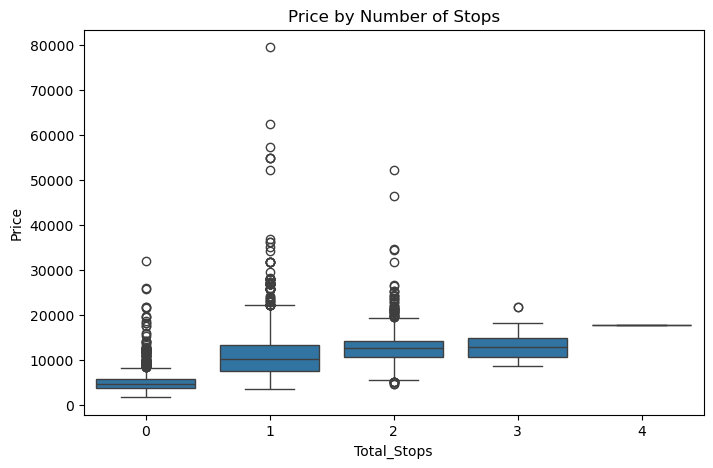

In [83]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Total_Stops', y='Price')
plt.title("Price by Number of Stops")
plt.show()


### Concatenating Formatted "Airline" Columns

In [32]:
df=pd.concat([df,Airline, Source, Destination],axis=1)

In [33]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [34]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [35]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Airline                            10682 non-null  object
 1   Source                             10682 non-null  object
 2   Destination                        10682 non-null  object
 3   Total_Stops                        10682 non-null  int64 
 4   Price                              10682 non-null  int64 
 5   Journey_Day                        10682 non-null  int32 
 6   Journey_Month                      10682 non-null  int32 
 7   Dep_Hour                           10682 non-null  int32 
 8   Dep_Minute                         10682 non-null  int32 
 9   Arrival_Hour                       10682 non-null  int32 
 10  Arrival_Minute                     10682 non-null  int32 
 11  Duration_Hour                      10682 non-null  int64 
 12  Duration_

In [37]:
df.drop(columns=['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   Journey_Day                        10682 non-null  int32
 3   Journey_Month                      10682 non-null  int32
 4   Dep_Hour                           10682 non-null  int32
 5   Dep_Minute                         10682 non-null  int32
 6   Arrival_Hour                       10682 non-null  int32
 7   Arrival_Minute                     10682 non-null  int32
 8   Duration_Hour                      10682 non-null  int64
 9   Duration_Minute                    10682 non-null  int64
 10  Air India                          10682 non-null  int32
 11  GoAir                              10682 non-null  int32
 12  IndiGo                 

### Correlation of Columns

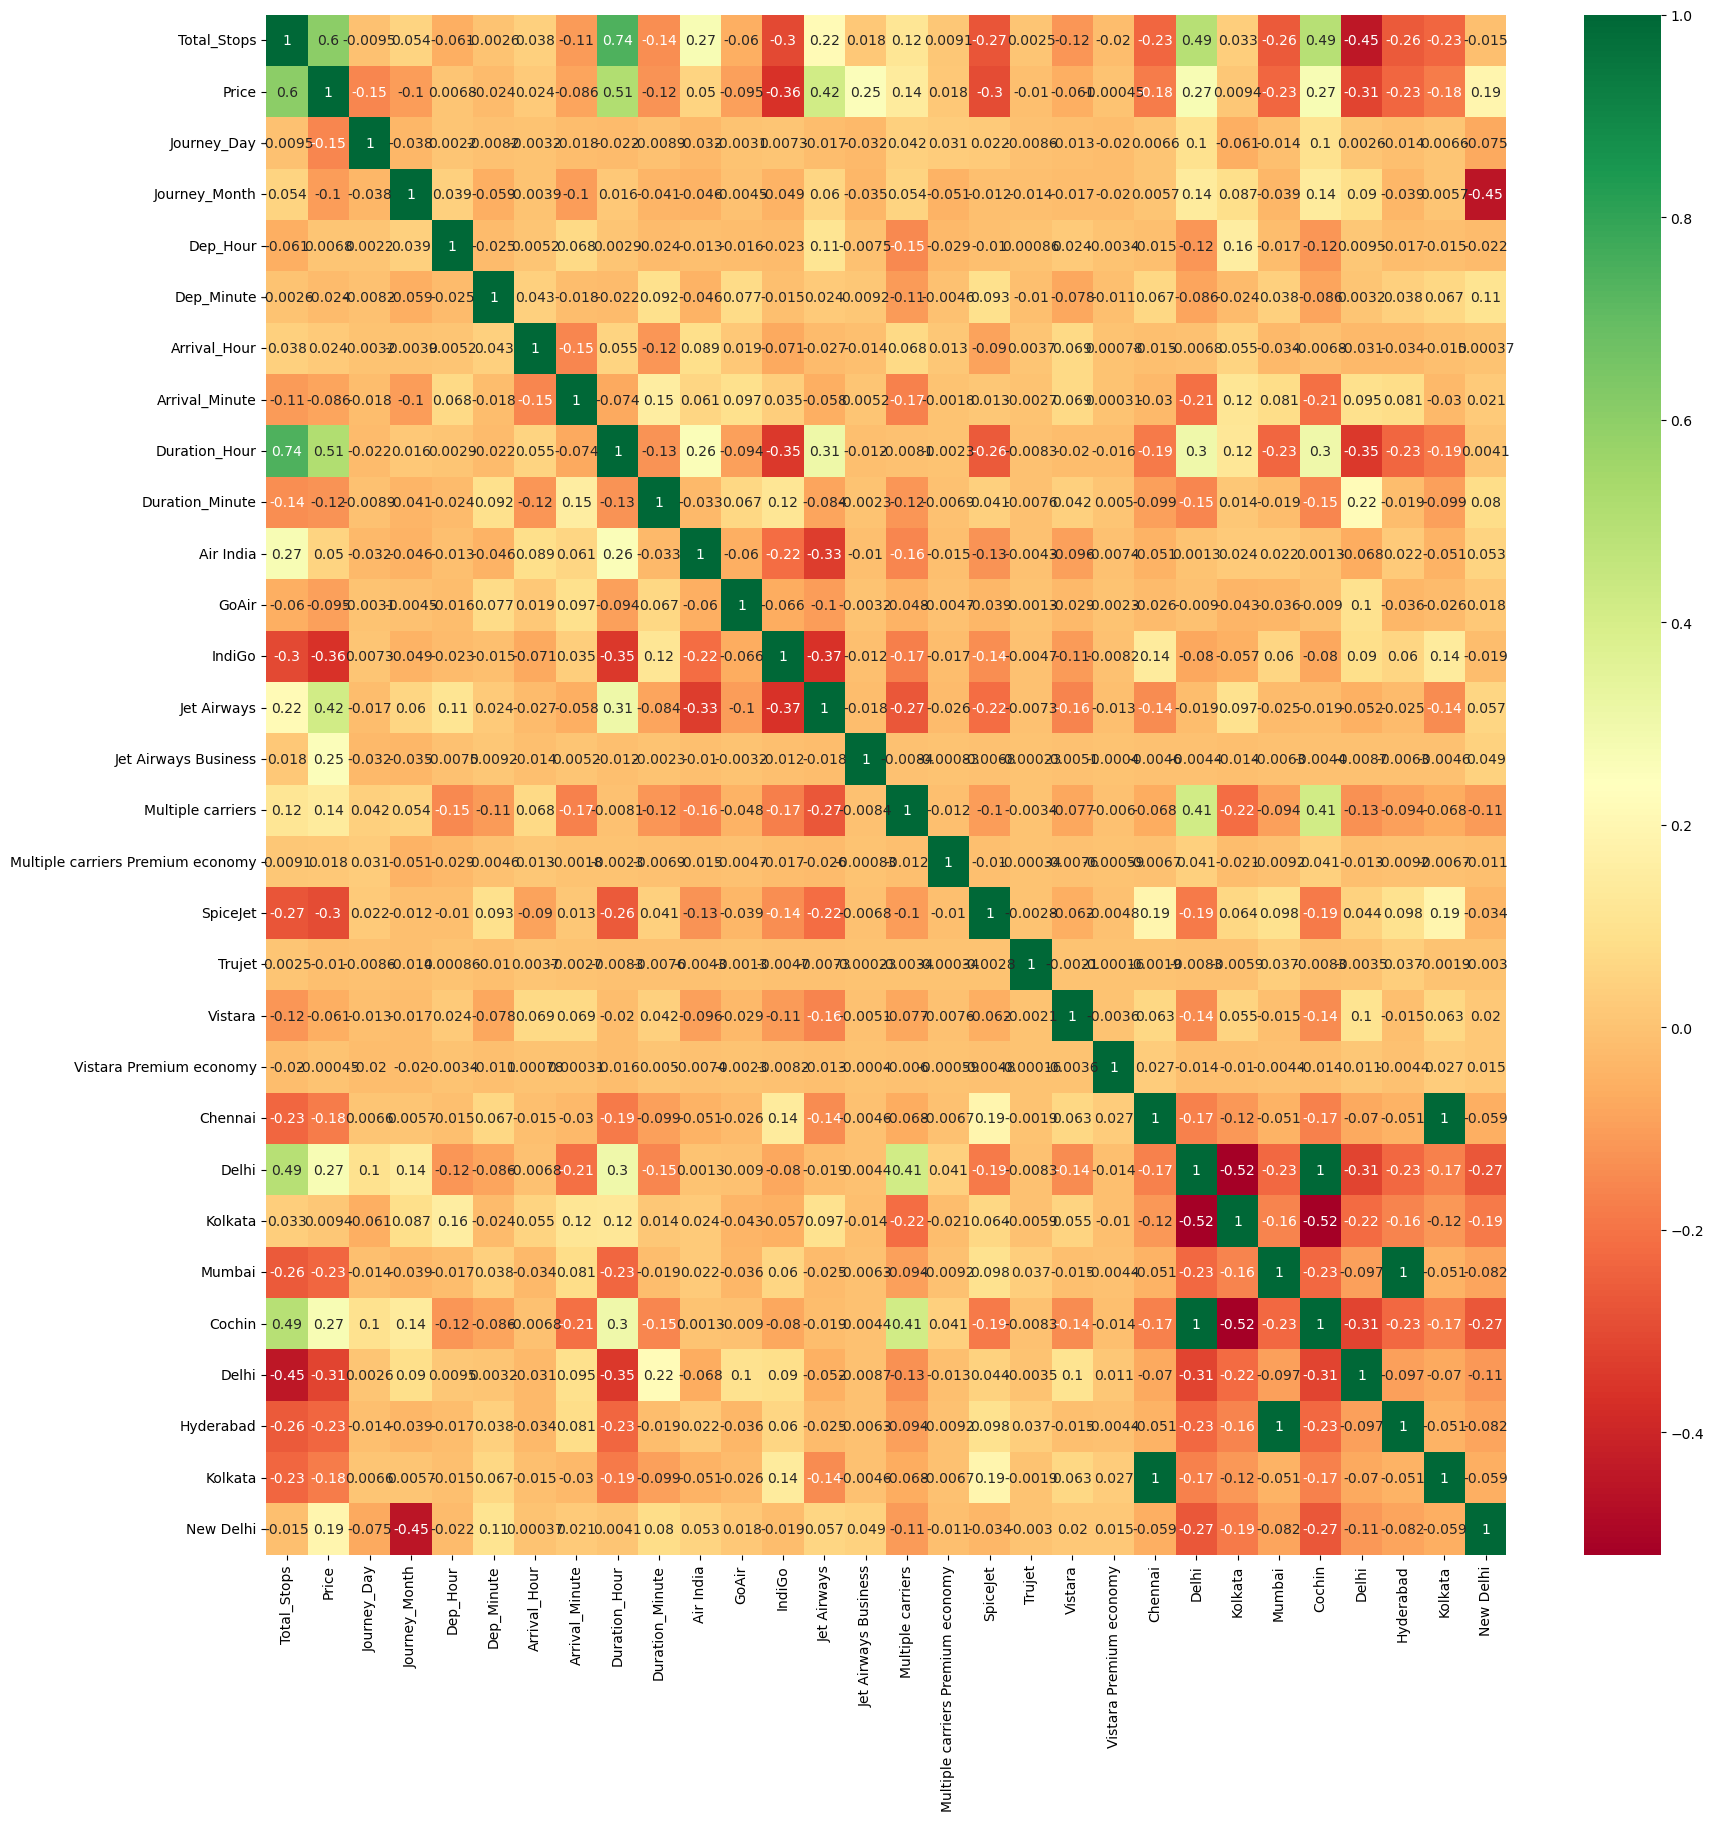

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr() , annot=True , cmap = 'RdYlGn')
plt.show()

<div style="text-align: center;margin-left: -5%;  font-size: 30px;">
    <b>TASK-2 : Model Building</b>
</div>

### BY USING,

### 1) Random Forest Regressor
### 2) XGBoost
### 3) Support Vector Regressor(SVR)
### 4) Linear Regression

<div style="text-align: left;  font-size: 30px;">
    <b>1) Random Forest Regressor</b>
</div>

In [40]:
X=df.drop(columns='Price',axis=1)
Y=df['Price']

In [41]:
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=51)


In [43]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
pred=reg.predict(X_test)

In [45]:
reg.score(X_train,y_train)

0.9544707221542295

In [46]:
reg.score(X_test,y_test)

0.8265438883695634

### ***Accuracy of Random Forest Regressor = 82%***

### Hyper Parameter Tuning

In [47]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(100,2000,10)]
max_depth = [int(x) for x in np.linspace(100,2000,10)]
min_samples_split=[2,4,6,8,10,12,14]
min_samples_leaf=[1,3,5,7,8,10]
max_features=['sqrt','log2','auto',None]

random_search = {
'n_estimators' : n_estimators,
'max_depth' : max_depth,
'min_samples_split' : min_samples_split,
'min_samples_leaf' : min_samples_leaf,
'max_features' : max_features,
}
random_search

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_depth': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
 'min_samples_leaf': [1, 3, 5, 7, 8, 10],
 'max_features': ['sqrt', 'log2', 'auto', None]}

In [48]:
reg_random = RandomizedSearchCV(estimator=reg , param_distributions=random_search , n_iter=10 , cv=5 , verbose=2 , random_state=51 , n_jobs=1)

In [49]:
reg_random.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   6.2s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.8s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.7s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   6.0s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   6.2s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=   7.3s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=   7.2s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklea

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [100, 311, 522, 733, 944,
                                                      1155, 1366, 1577, 1788,
                                                      2000],
                                        'max_features': ['sqrt', 'log2', 'auto',
                                                         None],
                                        'min_samples_leaf': [1, 3, 5, 7, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=51, verbose=2)

In [50]:
reg_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': 522}

In [51]:
prediction=reg_random.predict(X_test)

In [52]:
prediction=reg_random.predict(X_test)

In [53]:
reg_random.score(X_test,y_test)

0.8591414302646443

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("After Hypertunning:")
print(f"MAE: {mean_absolute_error(y_test, prediction):.2f}")
print(f"MSE: {mean_squared_error(y_test, prediction):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, prediction)):.2f}")
print(f"R² Score: {r2_score(y_test, prediction):.2f}")

After Hypertunning:
MAE: 1085.11
MSE: 2640576.38
RMSE: 1624.99
R² Score: 0.86


### ***Accuracy after Tuning = 86%***

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14812\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


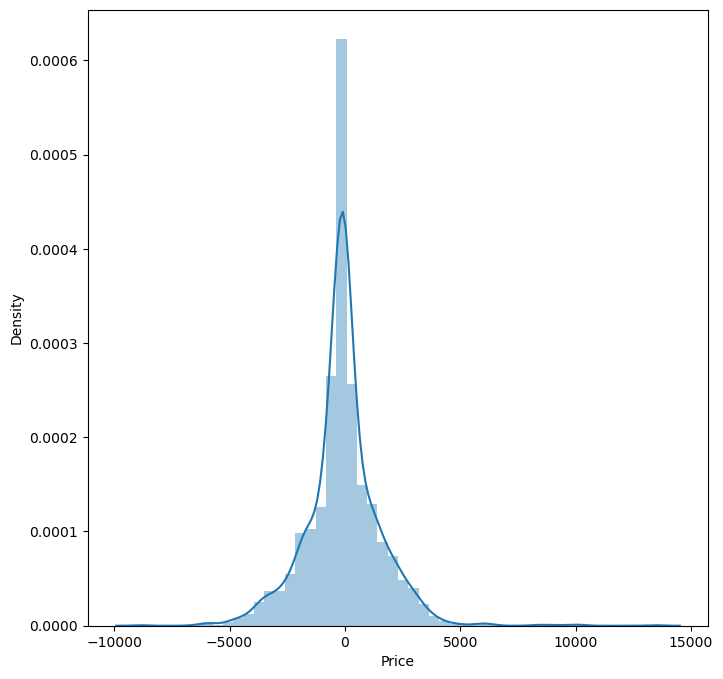

In [55]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

<div style="text-align: left;  font-size: 30px;">
    <b>2) XGBoost</b>
</div>

In [104]:
! pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 372.9 kB/s eta 0:05:34
   ---------------------------------------- 0.5/124.9 MB 372.9 kB/s eta 0:05:34
   ---------------------------------------- 0.5/124.9 MB 372.9 kB/s eta 0:05:34
   ---------------------------------------- 0.8/124.9 MB 385.5 kB/s eta 0:05:22
   ---------------------------------------- 0.8/124.9 MB 385.5 kB/s eta 0:05:22
   ---------------------------------------- 0.8/124.9 MB 385.5 kB/s eta 0:05:22
   ---------------------------------------- 0.8/124.9 MB 385.5 kB/s eta 0:05:22
   -----------

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Check the type of data

In [57]:
print(type(X_train))  
print(type(y_train))  


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Convert target variable to 1D array

In [58]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values.ravel()  
y_test = y_test.values.ravel()

In [59]:
print(type(X_train)) 
print(type(y_train))  

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [68]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)  

xgb_predictions = xgb_model.predict(X_test)

print("XGBoost Regressor:")
print(f"MAE: {mean_absolute_error(y_test, xgb_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, xgb_predictions):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_predictions)):.2f}")
print(f"R² Score: {r2_score(y_test, xgb_predictions):.2f}")


XGBoost Regressor:
MAE: 1243.15
MSE: 3465658.34
RMSE: 1861.63
R² Score: 0.84


### ***Accuracy of XGBoost = 84%***

<div style="text-align: left;  font-size: 30px;">
    <b>2) Support Vector Regressor</b>
</div>

In [69]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

print("SVR Performance:")
print(f"MAE: {mean_absolute_error(y_test, svr_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, svr_predictions):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, svr_predictions)):.2f}")
print(f"R² Score: {r2_score(y_test, svr_predictions):.2f}")


SVR Performance:
MAE: 3565.99
MSE: 21571036.13
RMSE: 4644.46
R² Score: -0.00


### Scaling SVR

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

svr_predictions = svr_model.predict(X_test_scaled)
print("Scaled SVR Performance:")
print(f"MAE: {mean_absolute_error(y_test, svr_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, svr_predictions):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, svr_predictions)):.2f}")
print(f"R² Score: {r2_score(y_test, svr_predictions):.2f}")


Scaled SVR Performance:
MAE: 3412.02
MSE: 20355422.24
RMSE: 4511.70
R² Score: 0.06


### Hyper Parameter Tuning SVR

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_svr = grid_search.best_estimator_

svr_predictions = best_svr.predict(X_test)
print("Tuned SVR Performance:")
print(f"MAE: {mean_absolute_error(y_test, svr_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, svr_predictions):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, svr_predictions)):.2f}")
print(f"R² Score: {r2_score(y_test, svr_predictions):.2f}")


Tuned SVR Performance:
MAE: 2462.35
MSE: 14571463.69
RMSE: 3817.26
R² Score: 0.32


### ***Accuracy of SVR = 32%***

<div style="text-align: left;  font-size: 30px;">
    <b>4) Linear Regression</b>
</div>

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, lr_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, lr_predictions):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_predictions)):.2f}")
print(f"R² Score: {r2_score(y_test, lr_predictions):.2f}")


Linear Regression Performance:
MAE: 1972.94
MSE: 8202327.56
RMSE: 2863.97
R² Score: 0.62


### ***Accuracy of Linear Regression = 62%***

<div style="text-align: left;  font-size: 30px;">
    <b>Conclusion</b>
</div>

####  * **Random Forest regressor** is a close second, especially after tuning. It’s more interpretable and stable.
#### it gives accuracy of  **86%**


#### * **SVR** is not suitable for this dataset, given its poor initial performance. And After tuning it gives  Accuracy of **32%.**


#### * **Linear Regression** is not ideal due to its lower accuracy and assumption of linearity. it gives Accuracy of **62%**


####  * **XGBoost** is the best model, with high base accuracy and potential for further improvement.
#### it gives higher performance without tuning of **84%**.


<div style="text-align: left;  font-size: 30px;">
    <b>Challenges</b>
</div>

####  * Linear Regression struggles for the non-linear data.

#### * SVR needs proper scaling, otherwise, it fails completely.

#### * Random Forest & XGBoost need tuning to prevent overfitting and improve accuracy.

#### * SVR is slow on large datasets.

#### * Random Forest takes more time than XGBoost.